# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

# Import dataset

In [2]:
df = pd.read_csv('C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

## Check data imbalance

In [3]:
print('Number of unique values present to identify diabetes')
print(df['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Data split

In [4]:
dfs = {}  # Dictionary to hold DataFrames

for i in range(3):
    dfs[f'df_{i}'] = df[df['Diabetes_012'] == i]

In [5]:
from sklearn.model_selection import train_test_split
train_df_0, test_df_0 = train_test_split(dfs['df_0'], test_size=0.2)
train_df_1, test_df_1 = train_test_split(dfs['df_1'], test_size=0.2)
train_df_2, test_df_2 = train_test_split(dfs['df_2'], test_size=0.2)

In [6]:
train_combined = pd.concat([train_df_0, train_df_1, train_df_2], ignore_index=True)
test_combined = pd.concat([test_df_0, test_df_1, test_df_2], ignore_index=True)

In [7]:
print(train_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64


In [8]:
print(test_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    42741
2.0     7070
1.0      927
Name: count, dtype: int64


# Smote oversampling

In [9]:
from imblearn.over_sampling import SMOTE
target_variable = 'Diabetes_012'


class_distribution = train_combined[target_variable].value_counts()
print("Class Distribution:")
print(class_distribution)



X = train_combined.drop(columns=[target_variable])
y = train_combined[target_variable]

desired_samples = {0: 300000, 1: 300000, 2: 300000}
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_variable])], axis=1)

print("Oversampled Class Distribution:")
print(df_oversampled[target_variable].value_counts())

Class Distribution:
Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64
Oversampled Class Distribution:
Diabetes_012
0.0    300000
1.0    300000
2.0    300000
Name: count, dtype: int64


# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_resampled, y_resampled)

GaussianNB()

# Predict test result

In [11]:
X_test = test_combined.drop(columns=[target_variable])
y_test = test_combined[target_variable]

In [12]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

[[28067  4969  9705]
 [  303   165   459]
 [ 1437  1059  4574]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.66      0.77     42741
         1.0       0.03      0.18      0.05       927
         2.0       0.31      0.65      0.42      7070

    accuracy                           0.65     50738
   macro avg       0.43      0.49      0.41     50738
weighted avg       0.84      0.65      0.71     50738



# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

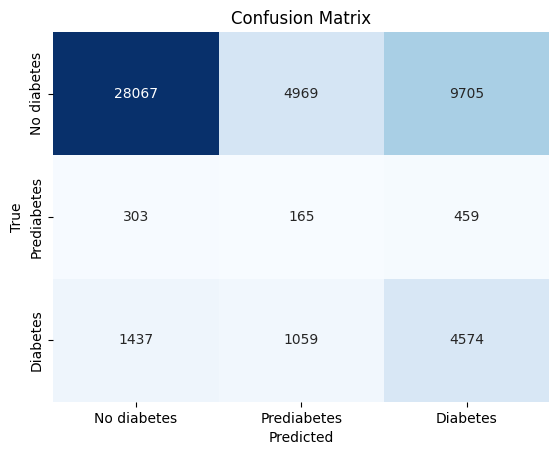

In [14]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

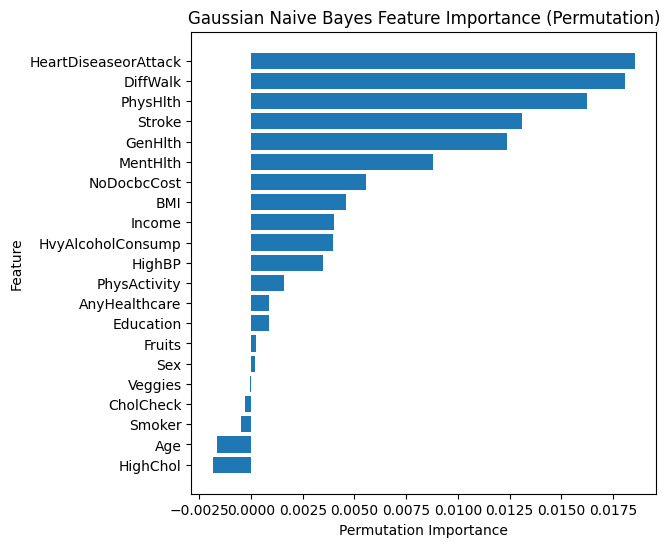

In [15]:
result = permutation_importance(classifier, X_test, y_test, n_repeats=10, random_state=42)

# Sort indices based on importance scores
sorted_idx = result.importances_mean.argsort()

# Plot the feature importance with feature names
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns.tolist()[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Gaussian Naive Bayes Feature Importance (Permutation)')
plt.show()